# Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Let's begin creating a dataFrame that we'll be using to analyse the data, and was previously processed to get reliable insights:

In [5]:
# Cargar datos procesados
data = pd.read_csv('../data/processed/vgsales_processed.csv')

## Sales Distribution Over Years

Let's begin with remembering the sales distribution over the years:

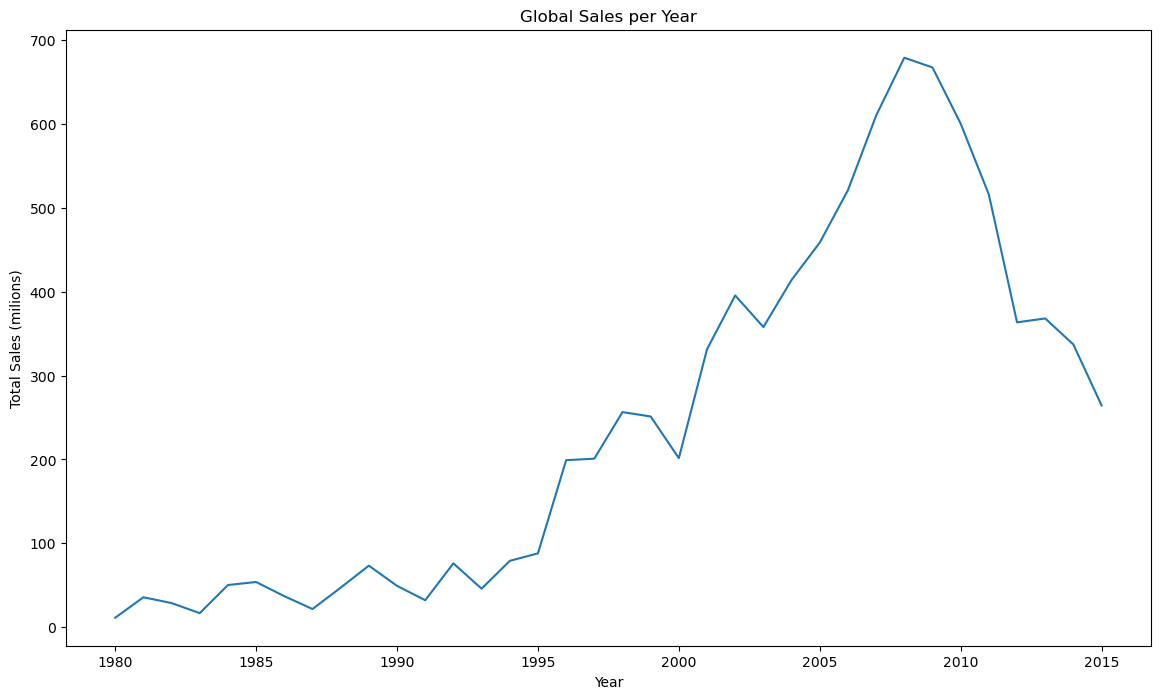

In [7]:
# Total Sales Analysis per year
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Global_Sales', data=data.groupby('Year')['Global_Sales'].sum().reset_index())
plt.title('Global Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales (milions)')
plt.show()

We can clearly see a distribution that suggest a future decrease on sales, as we can see in more detail in the following chart:

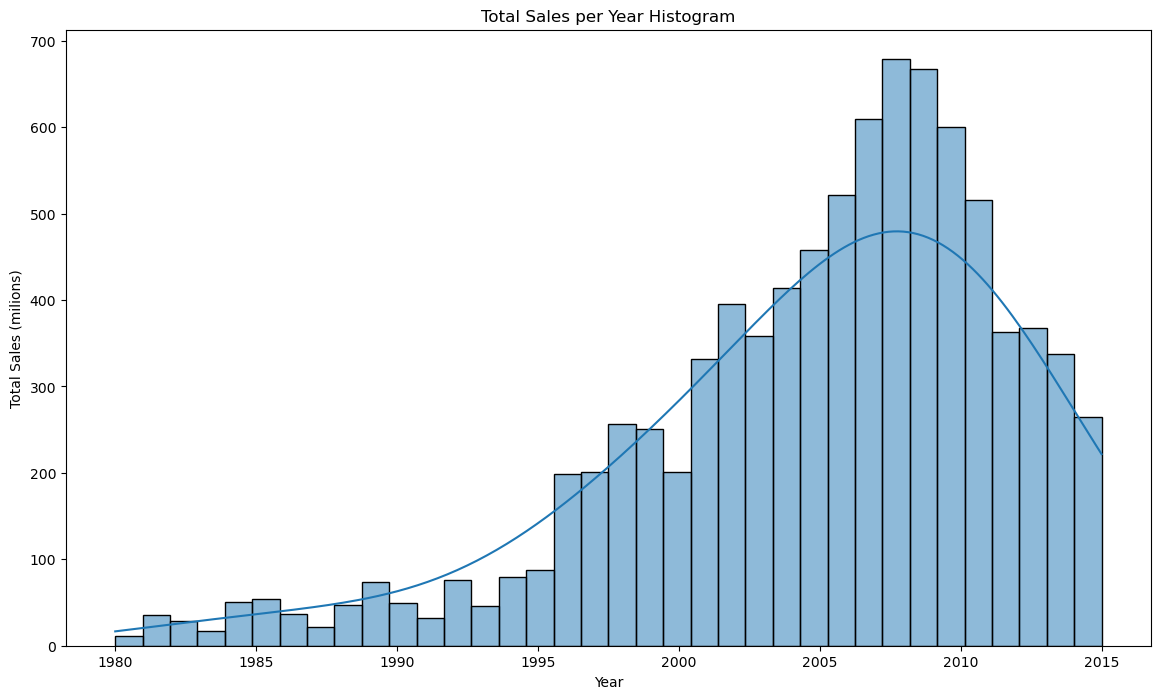

In [9]:
# Group Data per Year and sum the total Sales
yearly_sales = data.groupby('Year')['Global_Sales'].sum().reset_index()

# Create the Histogram
plt.figure(figsize=(14, 8))
sns.histplot(yearly_sales, x='Year', weights='Global_Sales', bins=yearly_sales['Year'].nunique(), kde=True)
plt.title('Total Sales per Year Histogram')
plt.xlabel('Year')
plt.ylabel('Total Sales (milions)')
plt.show()

Here we can clearly see the that data over year follows a normal distribution. Here we have our first important insight: if there isn't any important change in the videogame industry, sales will keep descreasing from 2015.

Okay, but now we have to ask "Why is this happening?", "How do we not notice this descrease?". At the moment we're doing this analysis (2022), we now that videogames have tended to be more and more sold, and we didn't noticed about this decrease.

There's two different factors that affect to this different perspective between what data tells us and oour preception.

The first one is pretty easy to understand: with the rise of smartphones, the industry of videogames have tended to create games for this new platforms. The point about this platforms is that the games with more downloads are by far those which are free to play, but you can pay in order to get advantages in the game. This is what is called a freemium model. This kind of games already existed before smartphones, but they got so popular with its rise, as it seems that for some companies is more worth to hace millions of downloads (that are leads for them), and then they try to convince their users to pay in their game). Some famous examples of this may by "Candy Crush", "Subway Surfers" or "Clash Royal". [There is an article that talks further about this](https://medium.com/@jaylu1217/the-rise-of-free-to-play-in-the-gaming-industry-ca052b9f95f2), if you want to get more information of the freemium mobile videogames industry. 

The other big reason about this decrease it that nowadays the leading videogames companies doesn't make that much videogames, but they make them more durable. In fact, when this companies release games, after a few months they release a DLC if the game has been sold succesfully. DLC means "Downloadable Content" and is and extra content that continues the end of a regular videogame. This leads to sales that are not shown as videogames sales, as they are not part of a videogame. [Here you can see another article that talks about this topic](https://medium.com/@mjperrotta46/business-models-of-video-games-past-present-and-future-2b2aafe8ade1).

## Sales Distribution over Region

Now let's see how the videogames are sold on different segions. Does the videogame sales follow the same distribution over every region? Which region are more important in terms of selling? Let's get answers to this quations!

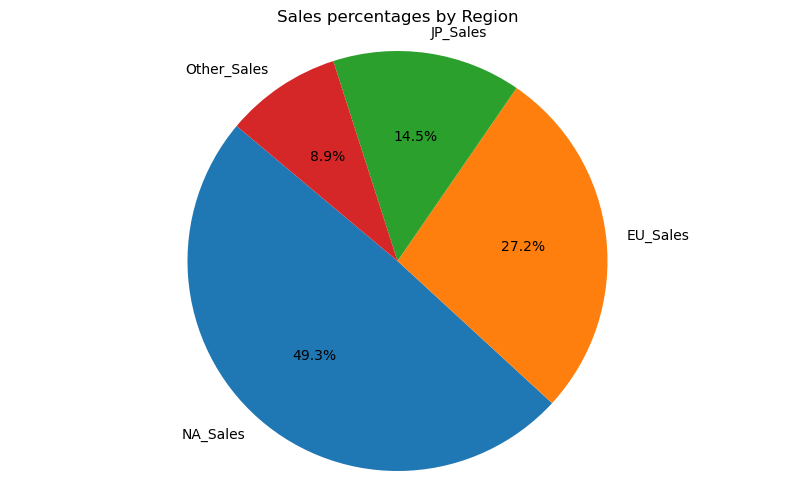

In [12]:
# We work with sales data gruped by region
region_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Calculate the percentages
region_sales_percent = region_sales / region_sales.sum() * 100

# Create a Donut Chart
plt.figure(figsize=(10, 6))
plt.pie(region_sales_percent, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales percentages by Region')
plt.axis('equal')
plt.show()

We can see that for the sales in Nort America (NA_Sales) represents almost half of the total for the years of study.But it was like this for everyyear? Let's find out how was the evolution of those region sales:

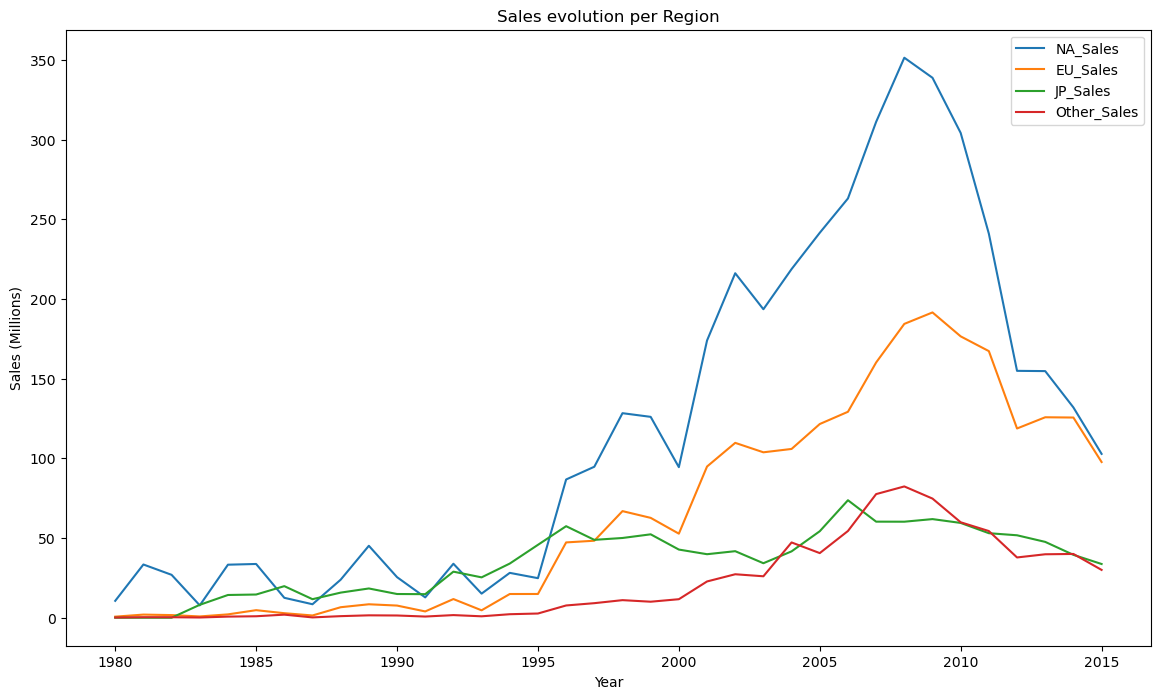

In [14]:
# Sales evolution per region
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.figure(figsize=(14, 8))
for region in regions:
    sns.lineplot(x='Year', y=region, data=data.groupby('Year')[region].sum().reset_index(), label=region)
plt.title('Sales evolution per Region')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.show()

All the sales evolution seem to have similar distribution, with the exception of Japan, that even if is not so different, looks like they got to the videogames trend before the other regions, getting the first place in sales in years between 1993 and 1995, and mantaining the sale levels on the following years. Apart from that, others regions follows the same trends with the same increase and decrease between 1995 and 2015. The conclusion we can take about this is that sales tendencies in general tend to perform the same way on any region.
Let's keep investigating. This time, let's check how does sales perform depending on platform. We'll be able to see which platforms had most success, and how they've developed. Let's begin by look on how many games were released on each platform, and sales for each of them:

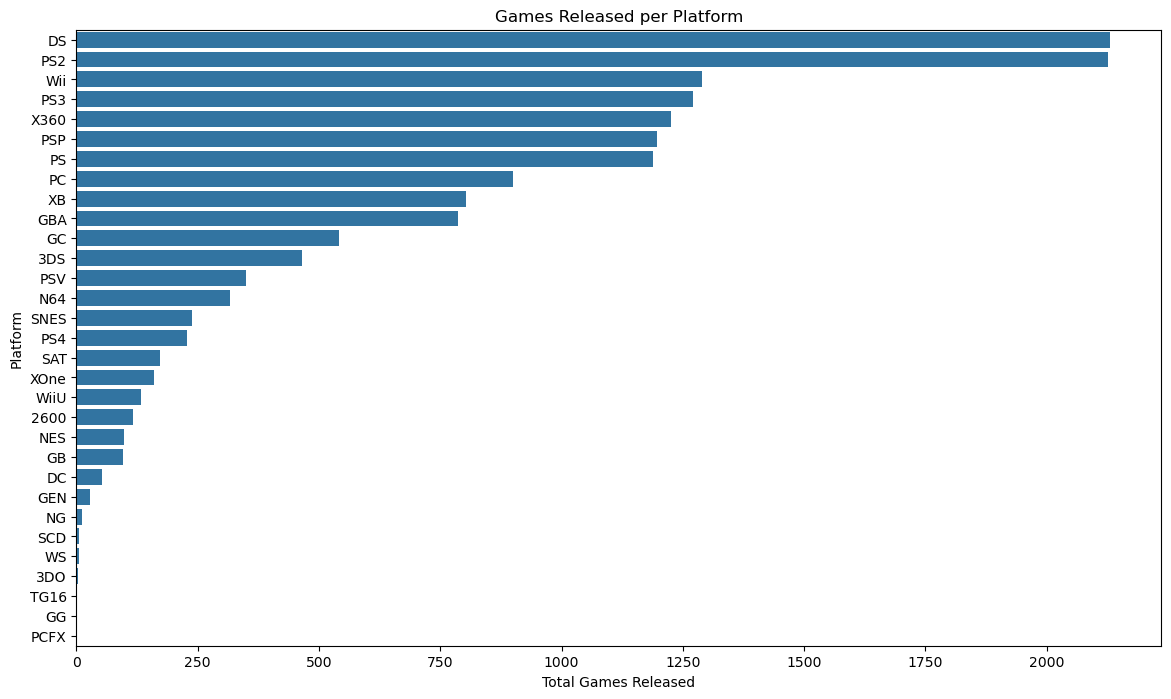

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(y='Platform', data=data, order=data['Platform'].value_counts().index)
plt.title('Games Released per Platform')
plt.xlabel('Total Games Released')
plt.ylabel('Platform')
plt.show()

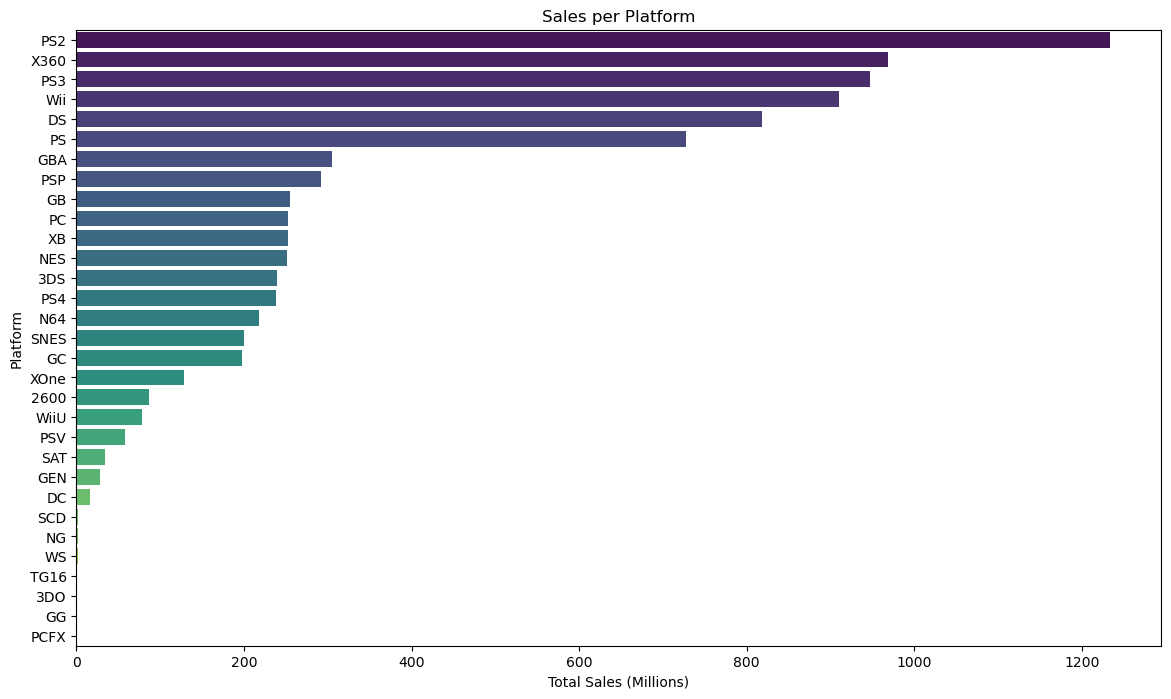

In [17]:
platform_sales = data.groupby('Platform')['Global_Sales'].sum().reset_index()

# Sort values
platform_sales = platform_sales.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(y='Platform', x='Global_Sales', data=platform_sales, palette='viridis', hue='Platform', legend=False)
plt.title('Sales per Platform')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Platform')
plt.show()

Through this last two charts, we can notice that, while the two most prolific platform in terms of games release are, by far, 'DS' and 'PS2', the majority of the sales are to 'PS2', 'X360', 'PS3', 'Wii', 'DS' and 'PS', in that order. In terms of worth platforms, we can see that 'X360' is the one with more differences between sales and games released, in a positive way. On the other hand, 'DS' has so many games released for the sales they had achieved.

Let's take the top 5 platforms in term of sales, to investigate them further. First, let's begin with a region sales evolution by platform, to check if the evolution with mora aggregated data keeps having a similar tendency:

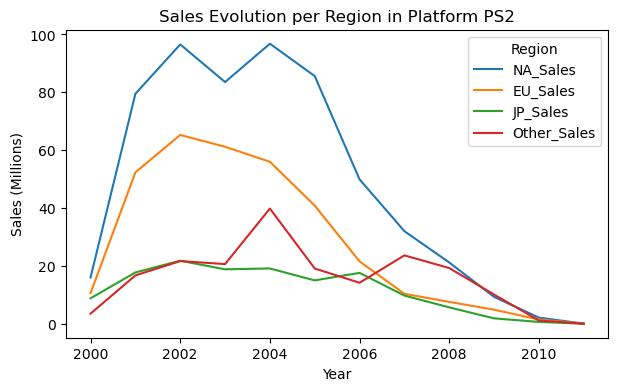

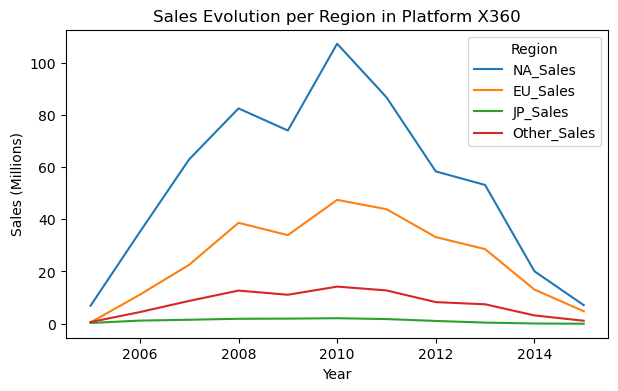

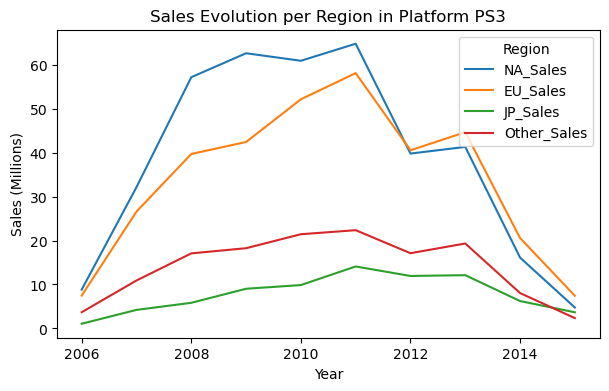

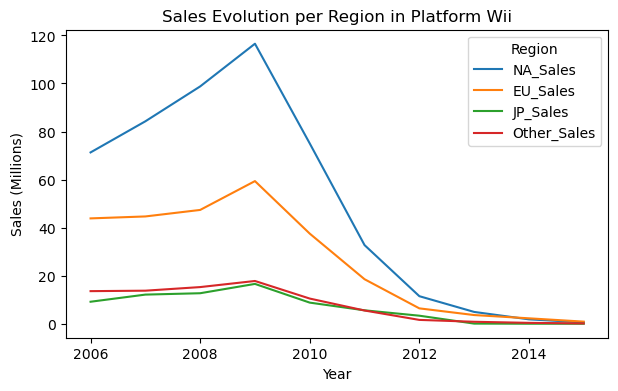

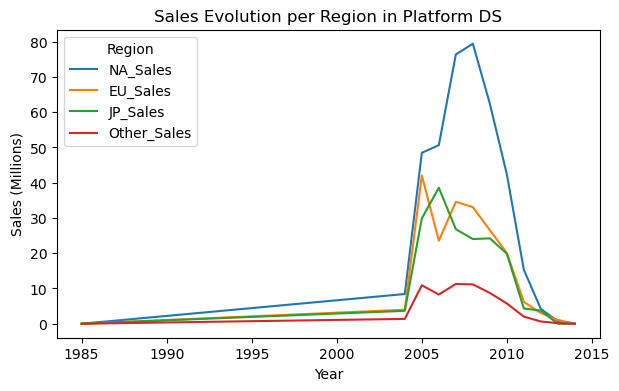

In [19]:
# Identify the TOP 5 Platforms in terms of sales
top_platforms = data.groupby('Platform')['Global_Sales'].sum().nlargest(5).index

# We create a chart for each Platform
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for platform in top_platforms:
    platform_data = data[data['Platform'] == platform].groupby('Year')[regions].sum().reset_index()
    
    plt.figure(figsize=(7, 4))
    for region in regions:
        sns.lineplot(x='Year', y=region, data=platform_data, label=region)
    plt.title(f'Sales Evolution per Region in Platform {platform}')
    plt.xlabel('Year')
    plt.ylabel('Sales (Millions)')
    plt.legend(title='Region')
    plt.show()

There's a clear tendency for each platform, that shows that region develops the same way on every stage. Could be interesting to mention that JP_Sales, depending on plattform, outperforms Other_Sales, but anyway the tendency they follow is the same.

Apart from that, we can see that there's a value that is definetly wrong, more specifically, wuth the 'DS' platform. While the Nintendo DS was released in 2004, there's a game that is registered in 1985. This data doesn't seem to have any impact in the globar analysis, but we're going to delete this row, in order to have the most reliable data possible. Then we'll save the csv file again in order to have this into account for future processes.

In [21]:

# Identify and Delete rows with 'DS' as Platform in years before 2004
data = data[~((data['Platform'] == 'DS') & (data['Year'] < 2004))]

# We save changes on our csv
data.to_csv('../data/processed/vgsales_processed_filtered.csv', index=False)

# Verify that data was deleted.
print(data[(data['Platform'] == 'DS') & (data['Year'] < 2004)])


Empty DataFrame
Columns: [Rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales]
Index: []


As we can see, there's no values from 'DS' before 2004. In the next graph, we'll be able to compare sales between the most important platforms, and we'll be able to see how this issue on data was solved.

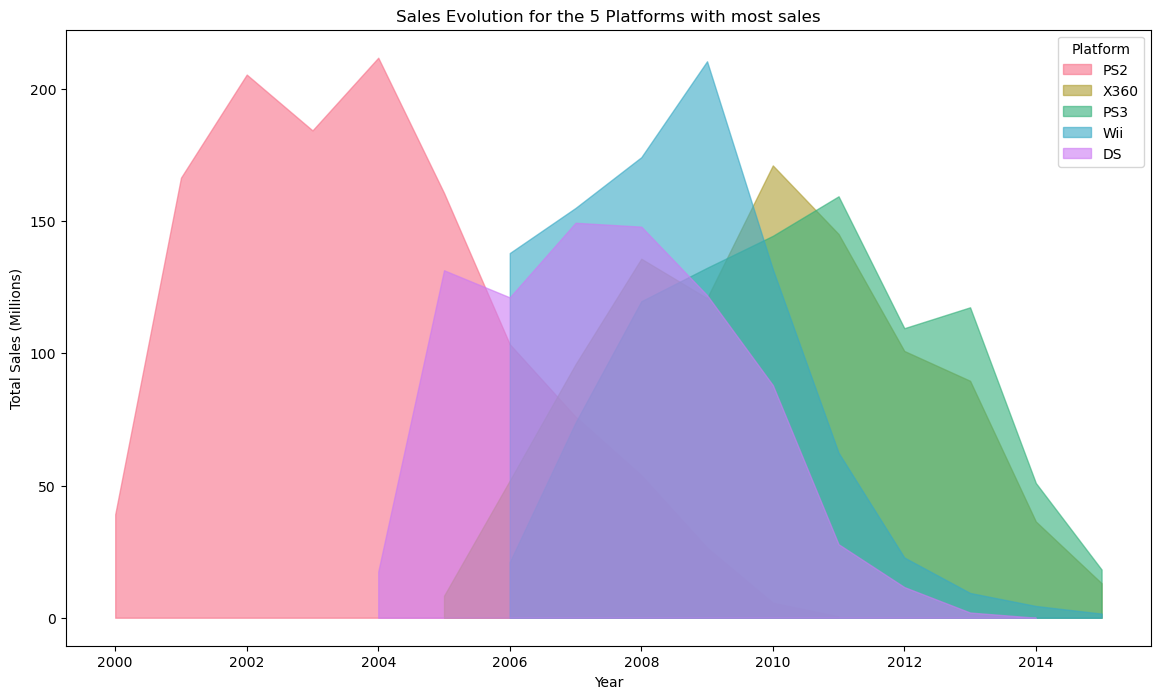

In [23]:
filtered_data = data[data['Platform'].isin(top_platforms)]

platform_sales_by_year = filtered_data.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14, 8))

colors = sns.color_palette('husl', len(top_platforms))

for idx, platform in enumerate(top_platforms):
    platform_data = platform_sales_by_year[platform_sales_by_year['Platform'] == platform]
    plt.fill_between(platform_data['Year'], platform_data['Global_Sales'], color=colors[idx], alpha=0.6, label=platform)

plt.title('Sales Evolution for the 5 Platforms with most sales')
plt.xlabel('Year')
plt.ylabel('Total Sales (Millions)')
plt.legend(title='Platform')
plt.show()

As expected, we can see that sales in a Platform doesn't match with a normal distribution, but with a Gamma distribution. The reason is that when a new Platform is released, it generates so much expectation that raises the sales of their games drammatically. When this Platform settles on market, and with the release of new Platforms, sales slowly descreases until it gets to a point where no more games are released for this specific platform, letting others lead the sales.

And now, what about the genre? Let's see how sales perform depending on genre:

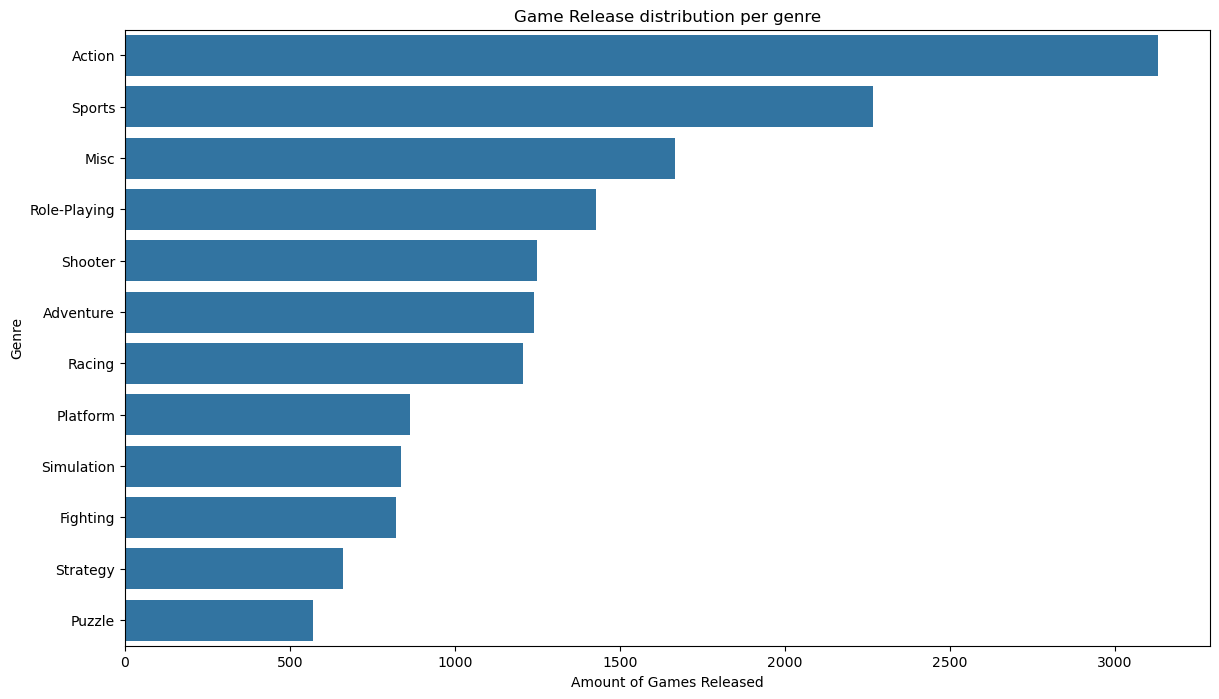

In [25]:
# Game release distribution per genre
plt.figure(figsize=(14, 8))
sns.countplot(y='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('Game Release distribution per genre')
plt.xlabel('Amount of Games Released')
plt.ylabel('Genre')
plt.show()

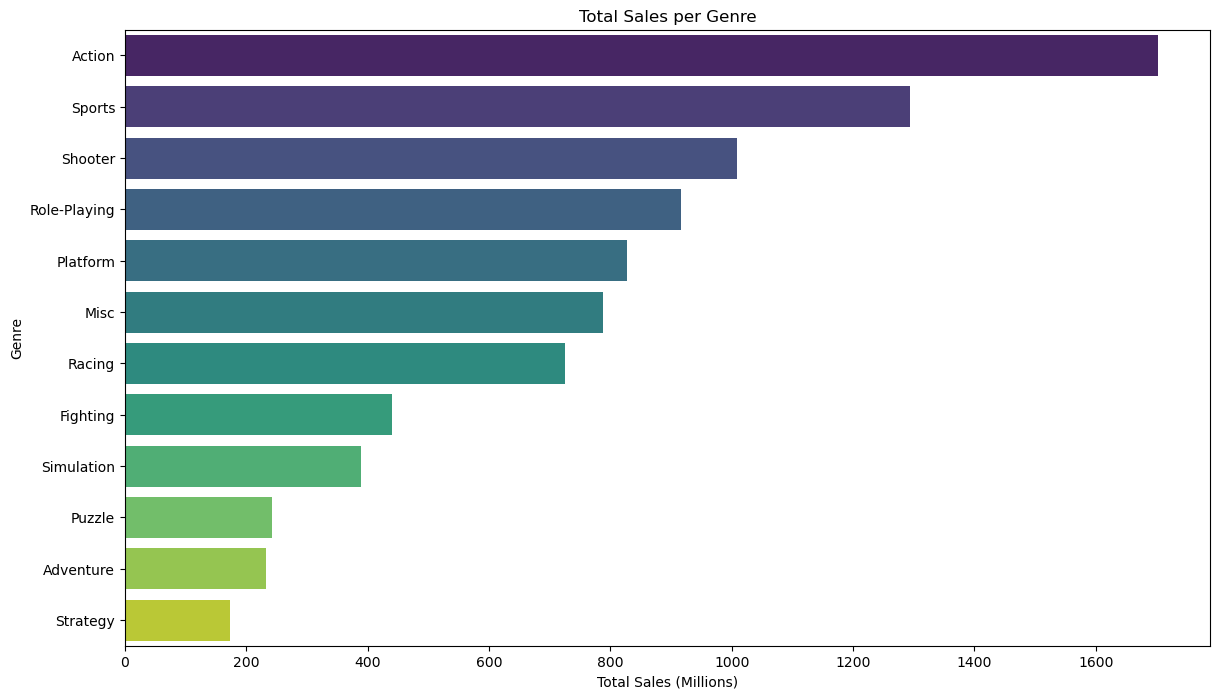

In [26]:
# Sales per Platform
genre_sales = data.groupby('Genre')['Global_Sales'].sum().reset_index()

genre_sales = genre_sales.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(y='Genre', x='Global_Sales', data=genre_sales, palette='viridis', hue='Genre', legend=False)
plt.title('Total Sales per Genre')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Genre')
plt.show()

Clearly the shooting games seems to be the mostr prolific ones, followed by the Platform ones, comparing sales against releases. On the other hand, the 'Misc' ones doesn't get many sells, compared to how many games are released.

As we did with platforms, let's further investigate the performance evolution on the TOP 5 selled Genres.

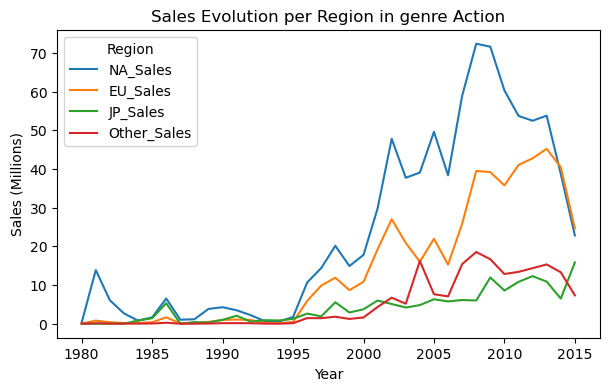

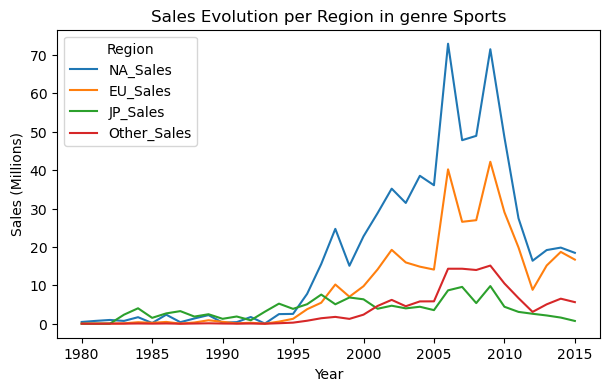

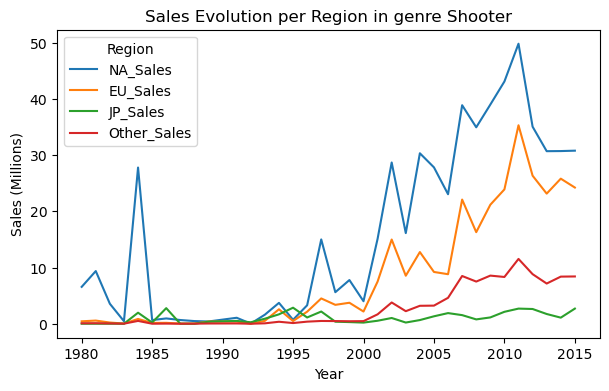

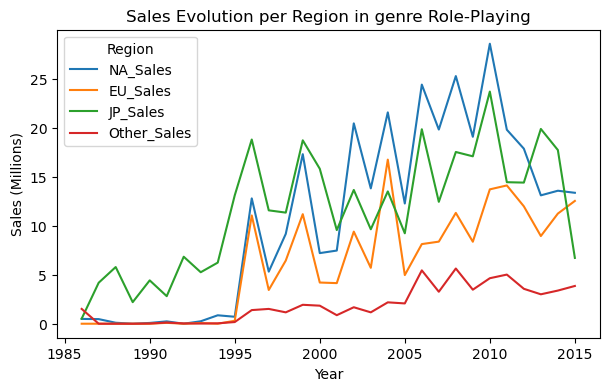

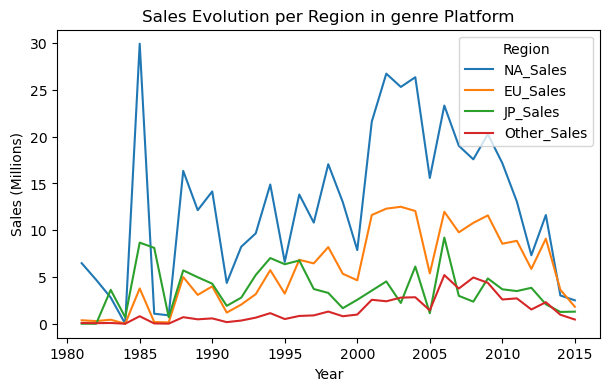

In [28]:
# Identif5 TOP 5 Genres based on Total Sales
top_genres = data.groupby('Genre')['Global_Sales'].sum().nlargest(5).index

regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for genre in top_genres:
    genre_data = data[data['Genre'] == genre].groupby('Year')[regions].sum().reset_index()
    
    plt.figure(figsize=(7, 4))
    for region in regions:
        sns.lineplot(x='Year', y=region, data=genre_data, label=region)
    plt.title(f'Sales Evolution per Region in genre {genre}')
    plt.xlabel('Year')
    plt.ylabel('Sales (Millions)')
    plt.legend(title='Region')
    plt.show()

There's an interesting insight on that analysis: the majority of genres perform the same way, apart from the 'Role-Playing' genre, where the JP_Sales get so many importance.

Last but not least, lets analyze the performance that has had the most important companies, here known as 'Publishers':

In [30]:
# We'll analyze the TOP 10 companies in terms of sales
top_publishers_sales = data.groupby('Publisher')['Global_Sales'].sum().nlargest(10).reset_index()
publisher_sales = data.groupby('Publisher').agg({'Global_Sales': 'sum', 'Name': 'count'}).reset_index()
publisher_sales.rename(columns={'Name': 'Game_Count'}, inplace=True)
top_publishers = publisher_sales.nlargest(10, 'Global_Sales')

filtered_data = data[data['Publisher'].isin(top_publishers)]


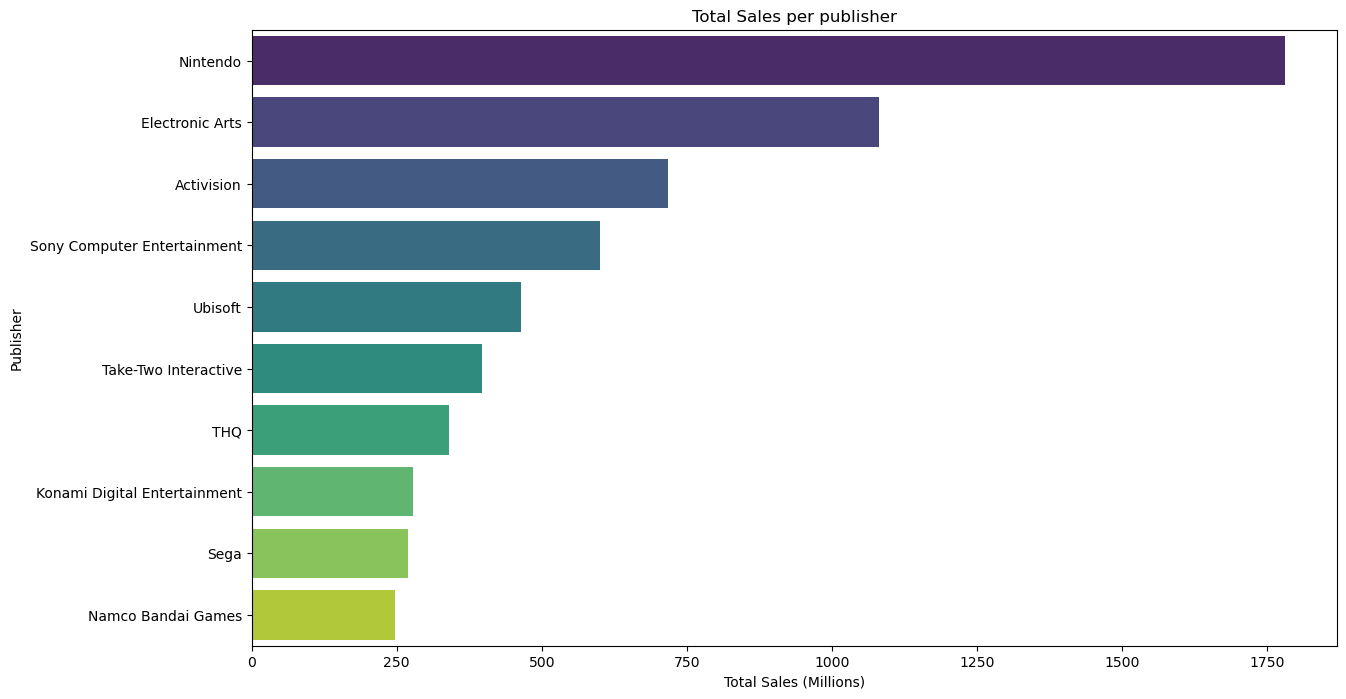

In [31]:
top_publishers_sales = top_publishers_sales.sort_values(by='Global_Sales', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(y='Publisher', x='Global_Sales', data=top_publishers_sales, palette='viridis', hue='Publisher', legend=False)
plt.title('Total Sales per publisher')
plt.xlabel('Total Sales (Millions)')
plt.ylabel('Publisher')
plt.show()

As we can see, Nintendo is clearly outperforming the rest of Publisher. Seems clear that their strategy is to releae less game, trying to maximaize their sales. On the next chart, we'll see how big is the ratio Sales/Game Releases on this company, compared to the others:

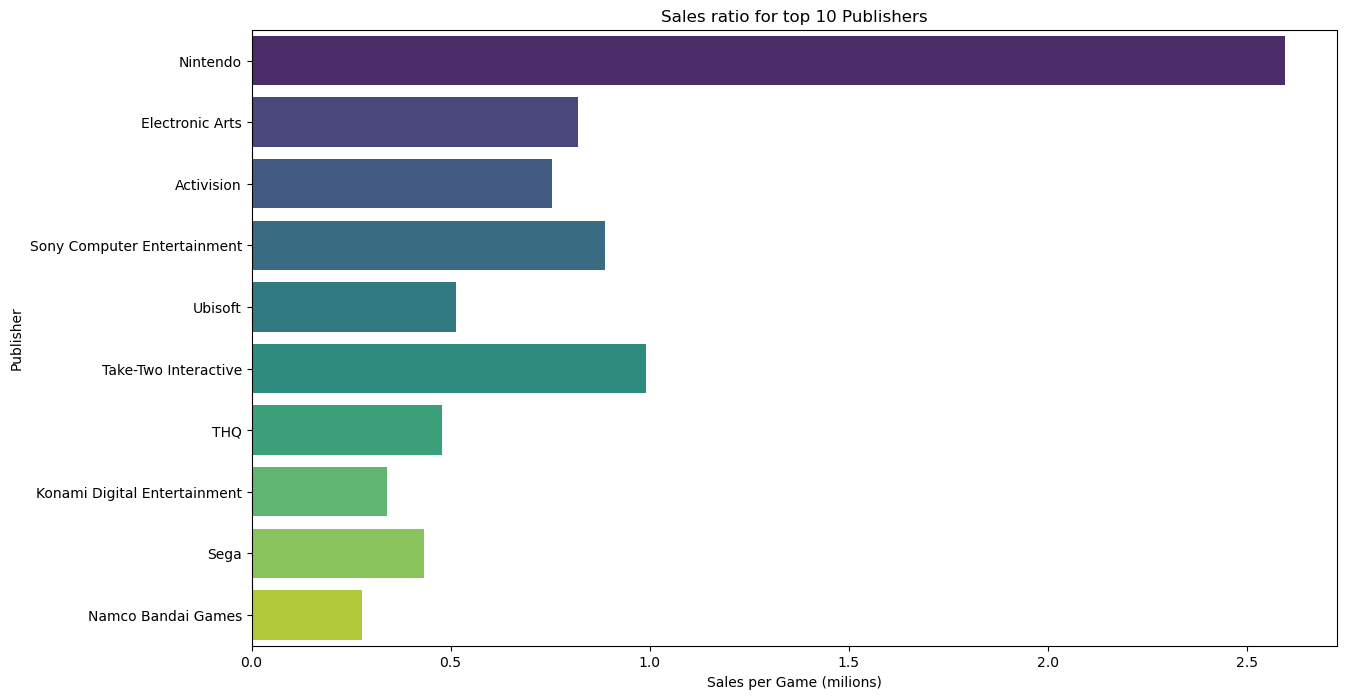

In [52]:
# Calculate total sales and game count by Publisher
publisher_sales = data.groupby('Publisher').agg({'Global_Sales': 'sum', 'Name': 'count'}).reset_index()
publisher_sales.rename(columns={'Name': 'Game_Count'}, inplace=True)

# Identify the 10 Publishers with the most global sales
top_publishers = publisher_sales.nlargest(10, 'Global_Sales')

# Calculate the sales ratio per game for the 10 publishers
top_publishers['Sales_per_Game'] = top_publishers['Global_Sales'] / top_publishers['Game_Count']

# Create the bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales_per_Game', y='Publisher', data=top_publishers, palette='viridis', hue='Publisher', legend=False)
plt.title('Sales ratio for top 10 Publishers')
plt.xlabel('Sales per Game (milions)')
plt.ylabel('Publisher')
plt.show()

As we can see here, while the rest of companies doesn't get more than 1M sales per game, Nintendo gets up to a 2.5M.